# **Covid dashboard with mercury**

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [5]:
covid = pd.read_csv("CovidFaelle_Altersgruppe.csv", sep = ';')

# without AUT (whole country)
covid_wo_aut = covid.loc[covid['Bundesland'] != "Österreich"]

In [11]:
state = ['Wien',
            'Niederösterreich',
            'Oberösterreich',
            'Burgenland', 
            'Steiermark',
            'Salzburg',
            'Kärnten',
            'Tirol', 'Vorarlberg']
male = False
female = True
age_group = ['1-4', '5-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85 and older']

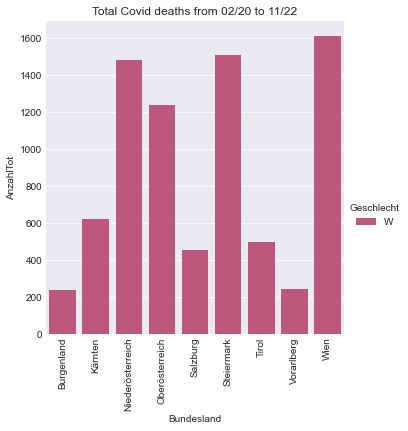

In [26]:
# Death count per state (absolute)

df_copy = covid_wo_aut.copy()

bundesland_sum_time = df_copy.groupby(by = ["Time", "Bundesland", "Geschlecht"], as_index = False).sum()
df = bundesland_sum_time[17892:17910][['Bundesland', 'AnzahlTot', 'Geschlecht']]
isin_state = df.Bundesland.isin(state)
df = df[isin_state]

if male == True and female == False:
    df = df[df['Geschlecht'] == 'M']

if male == False and female == True:
    df = df[df['Geschlecht'] == 'W']

plt.style.use('seaborn-darkgrid')
sns.catplot(x = "Bundesland",
                    kind = "bar",
                    y = "AnzahlTot",
                    hue = "Geschlecht",
                    data = df,
                    palette = "plasma").set(title = 'Total Covid deaths from 02/20 to 11/22')
plt.xticks(rotation = 90)
plt.show()

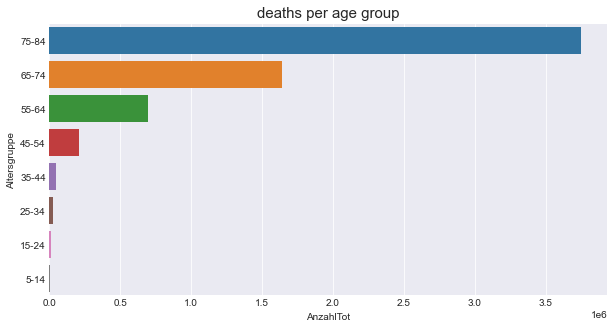

In [33]:
h3 = (covid_wo_aut
                    .filter(['Altersgruppe','AnzahlTot'])
                    .groupby('Altersgruppe')
                    .agg('sum')
                    .sort_values(['AnzahlTot'], ascending = False)
                    .reset_index()
                    )

#df = h3[17892:17910][['AnzahlTot', 'Altersgruppe']]
isin_age_group = h3.Altersgruppe.isin(age_group)
df = h3[isin_age_group]

plt.figure(figsize=(10,5))
plt.style.use('seaborn-darkgrid')
sns.barplot(data = df
             ,x = 'AnzahlTot'
             ,y = 'Altersgruppe'
             ).set_title('deaths per age group', fontsize=15)

plt.show()

In [30]:
!mercury run mercury-notebook.ipynb

                                                                                  
     _ __ ___   ___ _ __ ___ _   _ _ __ _   _ 
    | '_ ` _ \ / _ \ '__/ __| | | | '__| | | |
    | | | | | |  __/ | | (__| |_| | |  | |_| |
    |_| |_| |_|\___|_|  \___|\__,_|_|   \__, |
                                         __/ |
                                        |___/ 
        
Operations to perform:
  Apply all migrations: admin, auth, contenttypes, django_drf_filepond, notebooks, sessions, tasks
Running migrations:
  No migrations to apply.

0 static files copied to '/usr/local/lib/python3.9/site-packages/mercury/static', 199 unmodified.
The notebook mercury-notebook.ipynb will be updated
Successfully updated a notebook (id:8)
Performing system checks...

System check identified no issues (0 silenced).
January 22, 2023 - 19:29:09
Django version 3.2.5, using settings 'server.settings'
Starting development server at http://127.0.0.1:8000/
Quit the server with CONTROL-C.
celery beat v5.1.2 (su